In [429]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import Matrix, init_printing
from scipy.stats import norm

First let's set the parametes:  
$\rho$=0.95  
$\sigma$=0.007

In [430]:
rho=0.95
sigma=0.007
n=9

a) 

Now we'll find the upper and lower bound of the grid, by Tauchen's method.  
$$\theta_N=m\frac{\sigma}{\sqrt{1-\rho^2}}$$  
$$\theta_1=-m\frac{\sigma}{\sqrt{1-\rho^2}}$$
To be conservative I will use m = 3  


In [431]:
m=3
upp=m*sigma/(1-rho**2)**0.5
low=-upp

Now let's generate equidistant points, as well as the grid "separators", compute the cdfs of the limits we have created for 
 our state spaces, then create the Markov chain transition matrix, this is all done with the function built bellow "tau", and the np.space fuction 

In [432]:
def tau(n,rho,sigma,a,b):
    xgrid = np.linspace(low, upp,n )
    def grid(a,b,n):
        w=((np.sqrt(b-a))**2)/(n-1)
        x=np.empty(n-1)
        x[0]=a+w/2
        x[n-2]=b-w/2
        for i in range (n-3):
            x[i+1]=x[i]+w
        return x
    y=grid(a,b,n)
    trm = np.zeros((n, n-1))
    for j in range(n-1):
        for i in range(n):     
            trm[i, j] = norm.cdf(y[j],loc=rho*xgrid[i],scale=sigma)
    trmo=np.zeros((n,n))
    for i in range(n): 
        trmo[i,0]=trm[i,0]
        trmo[i,n-1]=1-trm[i,n-2]
        for j in range(n-2):
            trmo[i,j+1]=trm[i,j+1]-trm[i,j]
    return trmo
xgrid = np.linspace(low, upp,n )
trmo=tau(n,rho,sigma,a=low,b=upp)

In [433]:
def show(X):
    init_printing()
    display(Matrix(np.round(X,4)))
print("Tauchen's method transition matrix:")

show(trmo)

Tauchen's method transition matrix:


⎡0.7644  0.2347  0.0009    0       0       0       0       0       0   ⎤
⎢                                                                      ⎥
⎢0.0592  0.7405  0.1997  0.0006    0       0       0       0       0   ⎥
⎢                                                                      ⎥
⎢0.0001  0.0747  0.7569  0.1679  0.0004    0       0       0       0   ⎥
⎢                                                                      ⎥
⎢  0     0.0001  0.0931  0.7669  0.1396  0.0002    0       0       0   ⎥
⎢                                                                      ⎥
⎢  0       0     0.0002  0.1147  0.7702  0.1147  0.0002    0       0   ⎥
⎢                                                                      ⎥
⎢  0       0       0     0.0002  0.1396  0.7669  0.0931  0.0001    0   ⎥
⎢                                                                      ⎥
⎢  0       0       0       0     0.0004  0.1679  0.7569  0.0747  0.0001⎥
⎢                                                  

b)

The Rouwenhorst's method is based on a different grid and matrix using the following logic:

$$\theta_N=\sigma_\theta \sqrt{N-1} \quad \theta_1=-\theta_N \quad where \quad \sigma_\theta^2=\frac{\sigma^2}{1-\rho^2}$$


$$
P_N=p\left[\begin{array}{cc}
P_{N-1} & 0 \\
\mathbf{0}^{\prime} & 0
\end{array}\right]+(1-p)\left[\begin{array}{cc}
\mathbf{0} & P_{N-1} \\
0 & \mathbf{0}^{\prime}
\end{array}\right]+(1-p)\left[\begin{array}{cc}
\mathbf{0}^{\prime} & 0 \\
P_{N-1} & \mathbf{0}
\end{array}\right]+p\left[\begin{array}{cc}
0 & \mathbf{0}^{\prime} \\
\mathbf{0} & P_{N-1}
\end{array}\right]
$$
$$p=\frac{1+\rho}{2}, P_2=\left[\begin{array}{cc}p & 1-p \\ 1-p & p\end{array}\right]$$



Now i create another fuction to get this matrix:

In [434]:
def rouwenhorst(n, rho,sigma):
    p = (1 + rho) / 2
    maxi = (sigma**2 / (1 - rho**2))**(1/2) * np.sqrt(n - 1)
    mini=-maxi
    if n == 2:
        theta = np.array([[p, 1 - p], [1 - p, p]])

    else :
        p1 = np.zeros((n, n))
        p2 = np.zeros((n, n))
        p3 = np.zeros((n, n))
        p4 = np.zeros((n, n))

        new_mat = rouwenhorst(n - 1, rho, sigma)

        p1[:n - 1, :n - 1] = p * new_mat
        p2[:n - 1, 1:] = (1 - p) * new_mat
        p3[1:, :-1] = (1 - p) * new_mat
        p4[1:, 1:] = p * new_mat

        theta = p1 + p2 + p3 + p4
        for i in range (n):
            theta[i: ,:] = (theta[i:,:] / sum(theta[i]))

    return theta
maxi = (sigma**2 / (1 - rho**2))**(1/2) * np.sqrt(n - 1)
mini=-maxi
xgrid1 = np.linspace(mini, maxi, n)
trm1=rouwenhorst(n, rho,sigma)

In [435]:
print("Rouwenhorst's method  transition matrix:")

show(trm1)

Rouwenhorst's method  transition matrix:


⎡0.8167  0.1675  0.015   0.0008    0       0       0       0       0   ⎤
⎢                                                                      ⎥
⎢0.0209  0.8204  0.1469  0.0113  0.0005    0       0       0       0   ⎥
⎢                                                                      ⎥
⎢0.0005  0.042   0.8231  0.1261  0.0081  0.0003    0       0       0   ⎥
⎢                                                                      ⎥
⎢  0     0.0016  0.063   0.8247  0.1051  0.0054  0.0001    0       0   ⎥
⎢                                                                      ⎥
⎢  0     0.0001  0.0032  0.0841  0.8253  0.0841  0.0032  0.0001    0   ⎥
⎢                                                                      ⎥
⎢  0       0     0.0001  0.0054  0.1051  0.8247  0.063   0.0016    0   ⎥
⎢                                                                      ⎥
⎢  0       0       0     0.0003  0.0081  0.1261  0.8231  0.042   0.0005⎥
⎢                                                  

The  matrix's presented above only display the first four digits after the dot, this was made for visual reasons, the trmo and trm1 matrix's that contain the full numbers (and add up to 1 in each row) is what is going to be used for calculations.

(If interested the amount of numbers after the dot can be changed in the show function)

c)

Now we can simulate the process, starting with the continuous one to get its shocks:

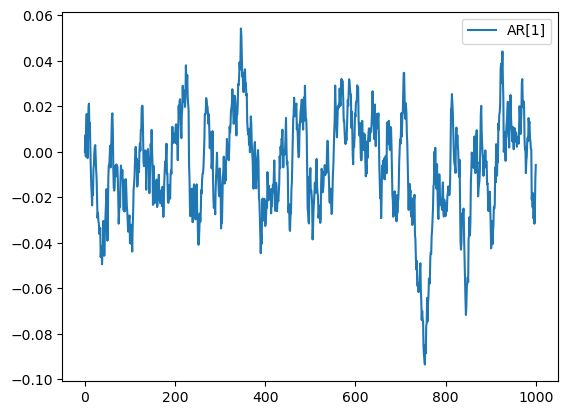

In [436]:
np.random.seed(1658)
x=np.empty(1001)
x[0]=0
alpha=0.95
T=1000
shocks=np.random.normal(size=1000,scale=0.007)
for t in range(T):
    x[t+1]=x[t]*alpha + shocks[t]
plt.plot(x, label='AR[1]')
plt.legend()
plt.show()    

We then get the cdf of the shocks, and choose the next state if the process in the discrete case as the first one that the sum of the transition matrix of the current step (starting from the left)

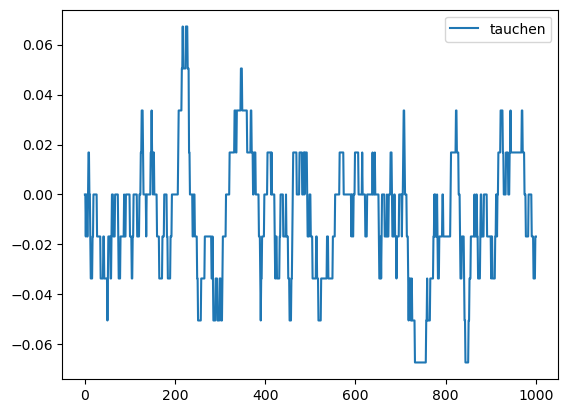

In [437]:
shocks_cdf= norm.cdf(shocks,scale=sigma)
nsteps = 1000
N = int((n-1)/2)
current_state = np.empty(nsteps+1)
current_state[0] = N
simulated_states = np.zeros(nsteps+1)
simulated_states[0] = 0
trm = np.zeros((n, n+1))
trm[:, 1:] = trmo
for i in range(nsteps):
    next_state_index = np.searchsorted(np.cumsum(trmo[int(current_state[i]), :]),
                                       shocks_cdf[i],side="left")
    current_state[i+1] = next_state_index
    simulated_states[i+1] = xgrid[int(current_state[i+1])]

plt.plot(simulated_states, label='tauchen')
plt.legend()
plt.show()

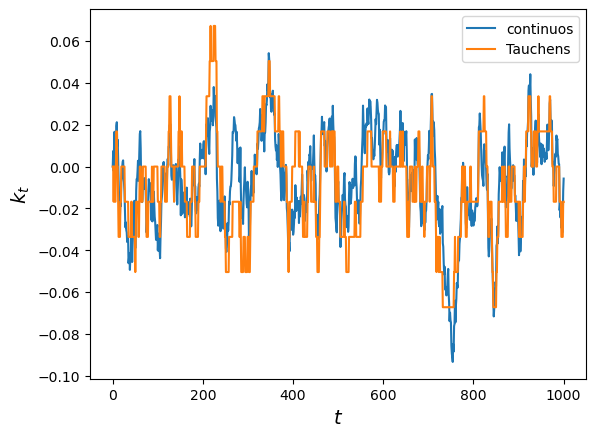

In [438]:
fig, ax = plt.subplots()
ax.plot(x,  label='continuos')
ax.plot(simulated_states, label='Tauchens')
ax.set_xlabel('$t$', fontsize=14)
ax.set_ylabel('$k_t$', fontsize=14)
ax.legend()
plt.show()

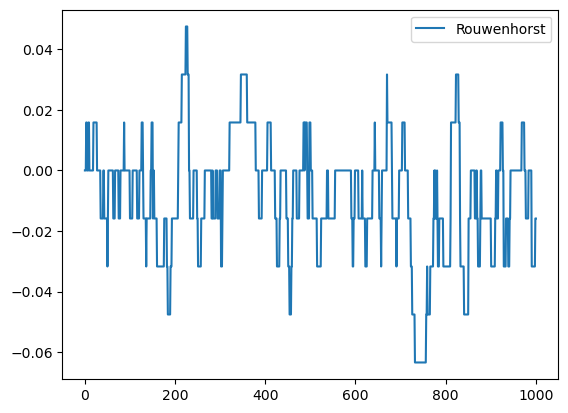

In [439]:
current_state1 = np.empty(nsteps+1)
current_state1[0] = N
simulated_states1 = np.zeros(nsteps+1)
simulated_states1[0] = 0
for i in range(nsteps):
    next_state_index = np.searchsorted(np.cumsum(trm1[int(current_state1[i]), :]),
                                       shocks_cdf[i],side="left")
    current_state1[i+1] = next_state_index
    simulated_states1[i+1] = xgrid1[int(current_state1[i+1])]

plt.plot(simulated_states1, label='Rouwenhorst')
plt.legend()
plt.show()

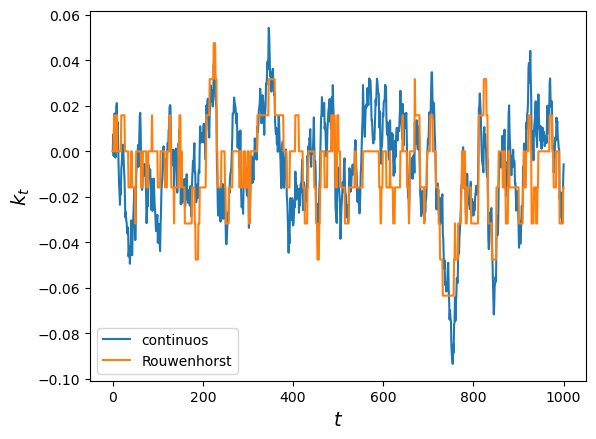

In [440]:
fig, ax = plt.subplots()
ax.plot(x,  label='continuos')
ax.plot(simulated_states1, label='Rouwenhorst')
ax.set_xlabel('$t$', fontsize=14)
ax.set_ylabel('$k_t$', fontsize=14)
ax.legend()
plt.show()

The graphs are kind off close but let's try n=21

In [441]:
n=21

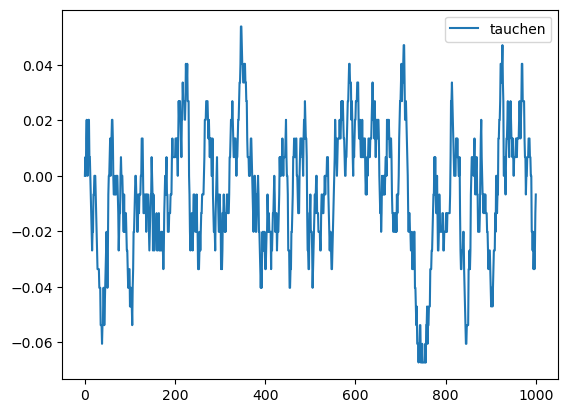

In [442]:
xgrid = np.linspace(low, upp,n )
trmo=tau(n,rho,sigma,a=low,b=upp)
N = int((n-1)/2)
current_state = np.empty(nsteps+1)
current_state[0] = N
simulated_states = np.zeros(nsteps+1)
simulated_states[0] = 0
for i in range(nsteps):
    next_state_index = np.searchsorted(np.cumsum(trmo[int(current_state[i]), :]),
                                       shocks_cdf[i],side="left")
    current_state[i+1] = next_state_index
    simulated_states[i+1] = xgrid[int(current_state[i+1])]

plt.plot(simulated_states, label='tauchen')
plt.legend()
plt.show()

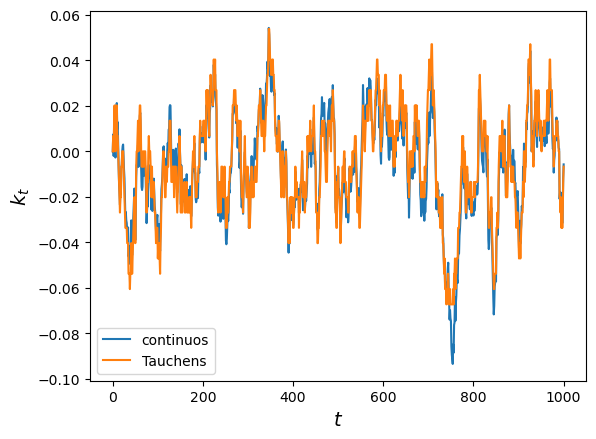

In [443]:
fig, ax = plt.subplots()
ax.plot(x,  label='continuos')
ax.plot(simulated_states, label='Tauchens')
ax.set_xlabel('$t$', fontsize=14)
ax.set_ylabel('$k_t$', fontsize=14)
ax.legend()
plt.show()

It is clear that we got much closer to the real distribuition, let's see with Rou

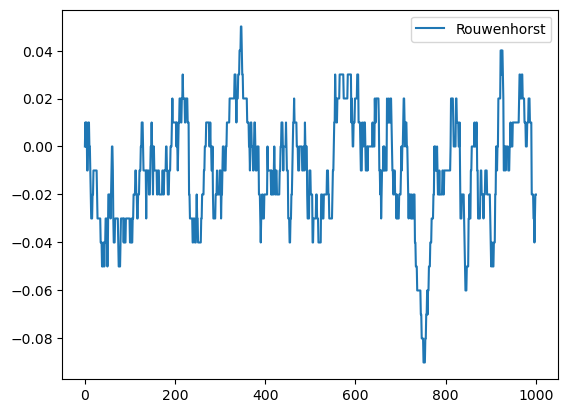

In [444]:
maxi = (sigma**2 / (1 - rho**2))**(1/2) * np.sqrt(n - 1)
mini=-maxi
xgrid1 = np.linspace(mini, maxi, n)
trm1=rouwenhorst(n, rho,sigma)
current_state1 = np.empty(nsteps+1)
current_state1[0] = N
simulated_states1 = np.zeros(nsteps+1)
simulated_states1[0] = 0
for i in range(nsteps):
    next_state_index = np.searchsorted(np.cumsum(trm1[int(current_state1[i]), :]),
                                       shocks_cdf[i],side="left")
    current_state1[i+1] = next_state_index
    simulated_states1[i+1] = xgrid1[int(current_state1[i+1])]

plt.plot(simulated_states1, label='Rouwenhorst')
plt.legend()
plt.show()

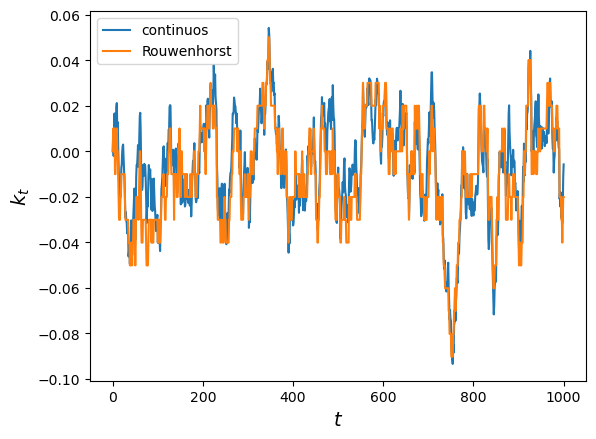

In [445]:
fig, ax = plt.subplots()
ax.plot(x,  label='continuos')
ax.plot(simulated_states1, label='Rouwenhorst')
ax.set_xlabel('$t$', fontsize=14)
ax.set_ylabel('$k_t$', fontsize=14)
ax.legend()
plt.show()

It is also much closer to the "real" distribution

d)

Let's go back to n=9 ang do the regression:

In [446]:
from sklearn.linear_model import LinearRegression

For Tauchen's method:

In [449]:
n=9

In [450]:
xgrid = np.linspace(low, upp,n )
trmo=tau(n,rho,sigma,a=low,b=upp)
N = int((n-1)/2)
current_state = np.empty(nsteps+1)
current_state[0] = N
simulated_states = np.zeros(nsteps+1)
simulated_states[0] = 0
for i in range(nsteps):
    next_state_index = np.searchsorted(
        np.cumsum(trmo[int(current_state[i]), :]),
                                       shocks_cdf[i],side="left")
    current_state[i+1] = next_state_index
    simulated_states[i+1] = xgrid[int(current_state[i+1])]
model = LinearRegression()
model.fit(simulated_states[1:].reshape(-1, 1), 
          simulated_states[:nsteps].reshape(-1, 1))
r_sq = model.score(simulated_states[1:].reshape(-1, 1), 
                   simulated_states[:nsteps].reshape(-1, 1))


print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)
print(f"coefficient of determination: {r_sq}")

Intercept: [-0.00051535]
Coefficients: [[0.94094989]]
coefficient of determination: 0.8853571143818355


The regression came out pretty acurate, let's checke for Rouwenhorst mehod:

In [451]:
maxi = (sigma**2 / (1 - rho**2))**(1/2) * np.sqrt(n - 1)
mini=-maxi
xgrid1 = np.linspace(mini, maxi, n)
trm1=rouwenhorst(n, rho,sigma)
current_state1 = np.empty(nsteps+1)
current_state1[0] = N
simulated_states1 = np.zeros(nsteps+1)
simulated_states1[0] = 0

for i in range(nsteps-1):
    next_state_index = np.searchsorted(
        np.cumsum(trm1[int(current_state1[i]), :]),
                                       shocks_cdf[i],side="left")
    current_state1[i+1] = next_state_index
    simulated_states1[i+1] = xgrid1[int(current_state1[i+1])]
model = LinearRegression()
model.fit(simulated_states1[1:].reshape(-1, 1), 
          simulated_states1[:nsteps].reshape(-1, 1))
r_sq = model.score(simulated_states1[1:].reshape(-1, 1),
                   simulated_states1[:nsteps].reshape(-1, 1))


print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)
print(f"coefficient of determination: {r_sq}")

Intercept: [-0.00057746]
Coefficients: [[0.93400629]]
coefficient of determination: 0.8723677556622678


It is still pretty good, but let's try with n=21, for Tauchen's and Rouwenhorst's methods respectivly

In [455]:
n=21

In [456]:
xgrid = np.linspace(low, upp,n )
trmo=tau(n,rho,sigma,a=low,b=upp)
N = int((n-1)/2)
current_state = np.empty(nsteps+1)
current_state[0] = N
simulated_states = np.zeros(nsteps+1)
simulated_states[0] = 0
for i in range(nsteps-1):
    next_state_index = np.searchsorted(np.cumsum(trmo[int(current_state[i]), :]),
                                       shocks_cdf[i],side="left")
    current_state[i+1] = next_state_index
    simulated_states[i+1] = xgrid[int(current_state[i+1])]
model = LinearRegression()
model.fit(simulated_states[1:].reshape(-1, 1),
          simulated_states[:nsteps].reshape(-1, 1))
r_sq = model.score(simulated_states[1:].reshape(-1, 1), 
                   simulated_states[:nsteps].reshape(-1, 1))


print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)
print(f"coefficient of determination: {r_sq}")

Intercept: [-0.00030133]
Coefficients: [[0.94482163]]
coefficient of determination: 0.8926879115636793


In [457]:
maxi = (sigma**2 / (1 - rho**2))**(1/2) * np.sqrt(n - 1)
mini=-maxi
xgrid1 = np.linspace(mini, maxi, n)
trm1=rouwenhorst(n, rho,sigma)
current_state1 = np.empty(nsteps+1)
current_state1[0] = N
simulated_states1 = np.zeros(nsteps+1)
simulated_states1[0] = 0
for i in range(nsteps-1):
    next_state_index = np.searchsorted(np.cumsum(trm1[int(current_state1[i]), :]),
                                       shocks_cdf[i],side="left")
    current_state1[i+1] = next_state_index
    simulated_states1[i+1] = xgrid1[int(current_state1[i+1])]
model = LinearRegression()
model.fit(simulated_states1[1:].reshape(-1, 1),
          simulated_states1[:nsteps].reshape(-1, 1))
r_sq = model.score(simulated_states1[1:].reshape(-1, 1), 
                   simulated_states1[:nsteps].reshape(-1, 1))


print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)
print(f"coefficient of determination: {r_sq}")

Intercept: [-0.00051436]
Coefficients: [[0.94748716]]
coefficient of determination: 0.8977319228773639


They both came out better

e) 
doing it again for:  
$\rho$=0.99

In [458]:
rho=0.99
n=9
m=3
upp=m*sigma/(1-rho**2)**0.5
low=-upp

In [460]:
xgrid = np.linspace(low, upp,n )
trmo=tau(n,rho,sigma,a=low,b=upp)
print("Tauchen's method transition matrix:")
show(trmo)

Tauchen's method transition matrix:


⎡0.9928  0.0072    0       0       0       0       0       0       0   ⎤
⎢                                                                      ⎥
⎢0.0024  0.9914  0.0062    0       0       0       0       0       0   ⎥
⎢                                                                      ⎥
⎢  0     0.0028  0.9918  0.0054    0       0       0       0       0   ⎥
⎢                                                                      ⎥
⎢  0       0     0.0033  0.9921  0.0046    0       0       0       0   ⎥
⎢                                                                      ⎥
⎢  0       0       0     0.0039  0.9921  0.0039    0       0       0   ⎥
⎢                                                                      ⎥
⎢  0       0       0       0     0.0046  0.9921  0.0033    0       0   ⎥
⎢                                                                      ⎥
⎢  0       0       0       0       0     0.0054  0.9918  0.0028    0   ⎥
⎢                                                  

In [461]:
maxi = (sigma**2 / (1 - rho**2))**(1/2) * np.sqrt(n - 1)
mini=-maxi
xgrid1 = np.linspace(mini, maxi, n)
trm1=rouwenhorst(n, rho,sigma)
print(" Rouwenhorst's method transition matrix:")
show(trm1)

 Rouwenhorst's method transition matrix:


⎡0.9607  0.0386  0.0007    0       0       0       0       0       0   ⎤
⎢                                                                      ⎥
⎢0.0048  0.9609  0.0338  0.0005    0       0       0       0       0   ⎥
⎢                                                                      ⎥
⎢  0     0.0097  0.961   0.029   0.0004    0       0       0       0   ⎥
⎢                                                                      ⎥
⎢  0     0.0001  0.0145  0.9611  0.0241  0.0002    0       0       0   ⎥
⎢                                                                      ⎥
⎢  0       0     0.0001  0.0193  0.9611  0.0193  0.0001    0       0   ⎥
⎢                                                                      ⎥
⎢  0       0       0     0.0002  0.0241  0.9611  0.0145  0.0001    0   ⎥
⎢                                                                      ⎥
⎢  0       0       0       0     0.0004  0.029   0.961   0.0097    0   ⎥
⎢                                                  

Now simulating a new AR[1] process and comparing to the simulations of Tauchens and Rouwenhorst's respectively.

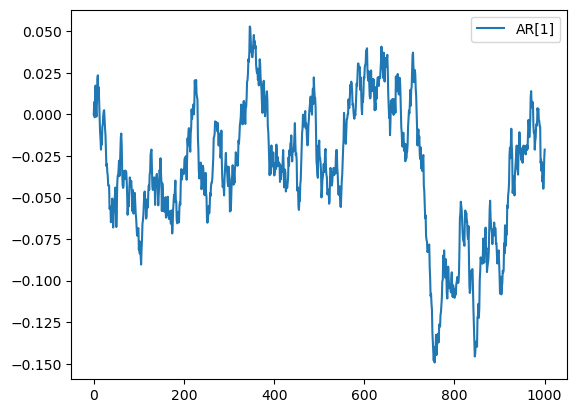

In [462]:
np.random.seed(1658)
x=np.empty(1001)
x[0]=0
alpha=0.99
T=1000
shocks=np.random.normal(size=1000,scale=0.007)
for t in range(T):
    x[t+1]=x[t]*alpha + shocks[t]
plt.plot(x, label='AR[1]')
plt.legend()
plt.show()    

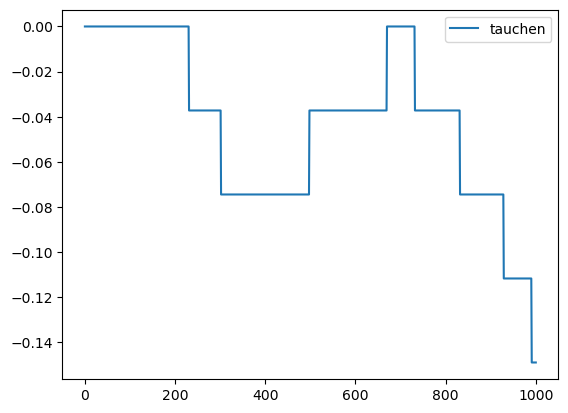

In [463]:
xgrid = np.linspace(low, upp,n )
trmo=tau(n,rho,sigma,a=low,b=upp)
N = int((n-1)/2)
current_state = np.empty(nsteps+1)
current_state[0] = N
simulated_states = np.zeros(nsteps+1)
simulated_states[0] = 0
for i in range(nsteps):
    next_state_index = np.searchsorted(np.cumsum(trmo[int(current_state[i]), :]), 
                                       shocks_cdf[i],side="left")
    current_state[i+1] = next_state_index
    simulated_states[i+1] = xgrid[int(current_state[i+1])]

plt.plot(simulated_states, label='tauchen')
plt.legend()
plt.show()

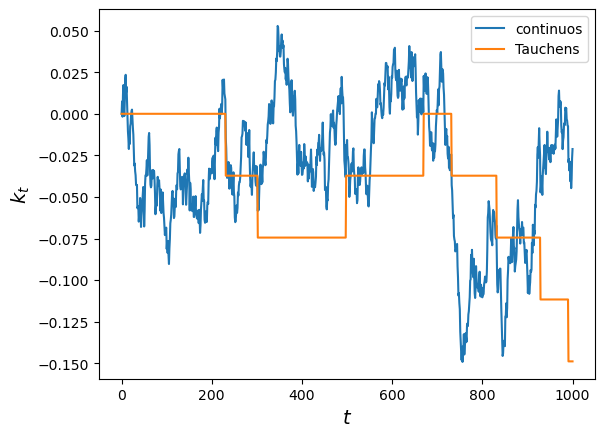

In [464]:
fig, ax = plt.subplots()
ax.plot(x,  label='continuos')
ax.plot(simulated_states, label='Tauchens')
ax.set_xlabel('$t$', fontsize=14)
ax.set_ylabel('$k_t$', fontsize=14)
ax.legend()
plt.show()

They are really not that close, we will later try again with a bigger n, but now let's see how Rouwenhorst's method

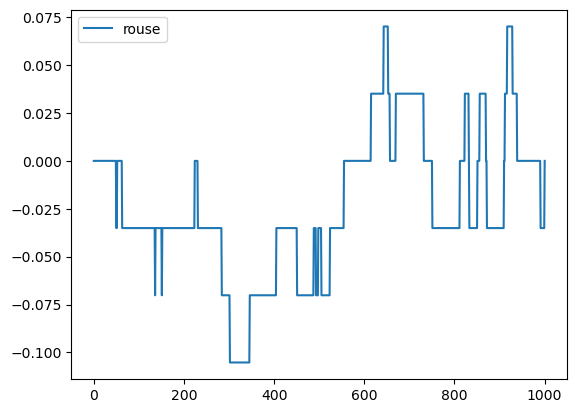

In [465]:
maxi = (sigma**2 / (1 - rho**2))**(1/2) * np.sqrt(n - 1)
mini=-maxi
xgrid1 = np.linspace(mini, maxi, n)
trm1=rouwenhorst(n, rho,sigma)
current_state1 = np.empty(nsteps+1)
current_state1[0] = N
simulated_states1 = np.zeros(nsteps+1)
simulated_states1[0] = 0
for i in range(nsteps-1):
    next_state_index = np.searchsorted(np.cumsum(trm1[int(current_state1[i]), :]), 
                                       shocks_cdf[i],side="left")
    current_state1[i+1] = next_state_index
    simulated_states1[i+1] = xgrid1[int(current_state1[i+1])]

plt.plot(simulated_states1, label='rouse')
plt.legend()
plt.show()

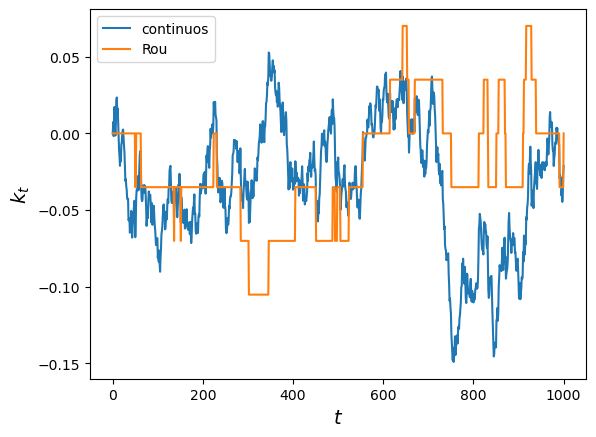

In [466]:
fig, ax = plt.subplots()
ax.plot(x,  label='continuos')
ax.plot(simulated_states1, label='Rou')
ax.set_xlabel('$t$', fontsize=14)
ax.set_ylabel('$k_t$', fontsize=14)
ax.legend()
plt.show()

it is not very close either, let's try for a bigger n:

In [467]:
rho=0.99
n=61

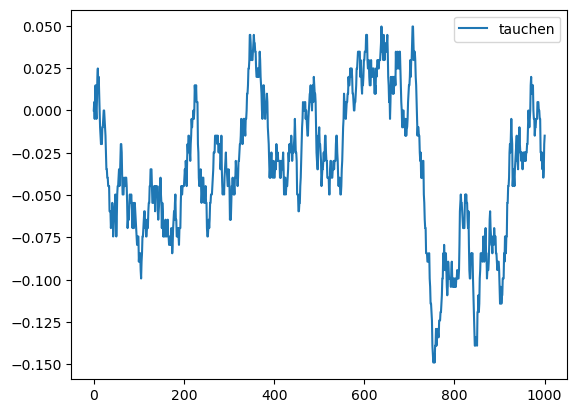

In [468]:
xgrid = np.linspace(low, upp,n )
trmo=tau(n,rho,sigma,a=low,b=upp)
N = int((n-1)/2)
current_state = np.empty(nsteps+1)
current_state[0] = N
simulated_states = np.zeros(nsteps+1)
simulated_states[0] = 0
for i in range(nsteps):
    next_state_index = np.searchsorted(np.cumsum(trmo[int(current_state[i]), :]),
                                       shocks_cdf[i],side="left")
    current_state[i+1] = next_state_index
    simulated_states[i+1] = xgrid[int(current_state[i+1])]

plt.plot(simulated_states, label='tauchen')
plt.legend()
plt.show()

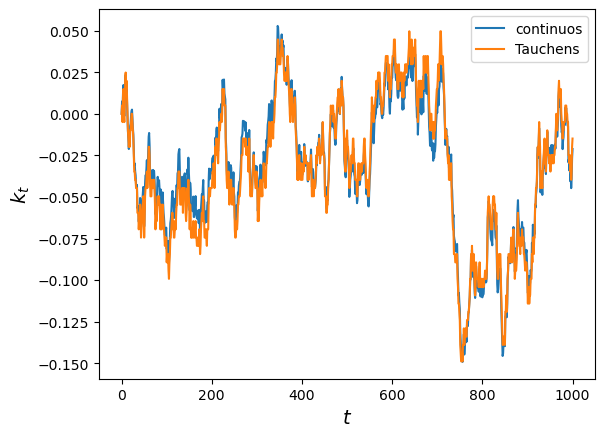

In [469]:
fig, ax = plt.subplots()
ax.plot(x,  label='continuos')
ax.plot(simulated_states, label='Tauchens')
ax.set_xlabel('$t$', fontsize=14)
ax.set_ylabel('$k_t$', fontsize=14)
ax.legend()
plt.show()

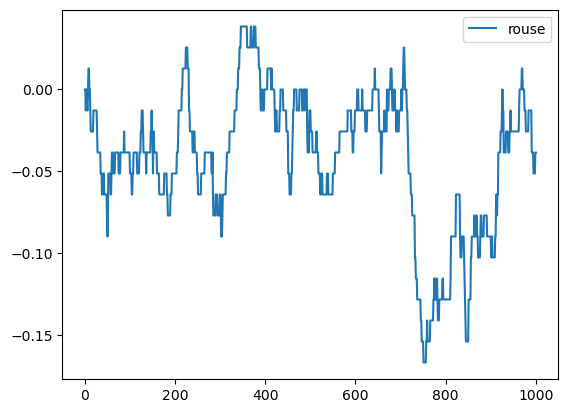

In [470]:
maxi = (sigma**2 / (1 - rho**2))**(1/2) * np.sqrt(n - 1)
mini=-maxi
xgrid1 = np.linspace(mini, maxi, n)
trm1=rouwenhorst(n, rho,sigma)
current_state1 = np.empty(nsteps+1)
current_state1[0] = N
simulated_states1 = np.zeros(nsteps+1)
simulated_states1[0] = 0
for i in range(nsteps):
    next_state_index = np.searchsorted(np.cumsum(trm1[int(current_state1[i]), :]),
                                       shocks_cdf[i],side="left")
    current_state1[i+1] = next_state_index
    simulated_states1[i+1] = xgrid1[int(current_state1[i+1])]

plt.plot(simulated_states1, label='rouse')
plt.legend()
plt.show()

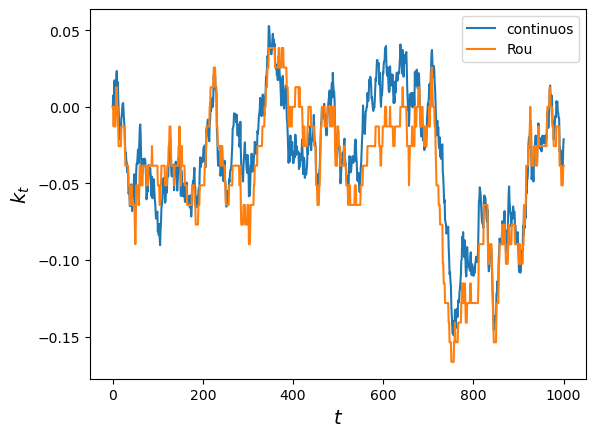

In [471]:
fig, ax = plt.subplots()
ax.plot(x,  label='continuos')
ax.plot(simulated_states1, label='Rou')
ax.set_xlabel('$t$', fontsize=14)
ax.set_ylabel('$k_t$', fontsize=14)
ax.legend()
plt.show()

I tried the process with bigger n's and they only started doing good with n>60

Now let's do regressions for Tauchen's and Rouwenhorst's methods respectivly

In [472]:
n=9

In [473]:
upp=m*sigma/(1-rho**2)**0.5
low=-upp
xgrid = np.linspace(low, upp,n )
trmo=tau(n,rho,sigma,a=low,b=upp)
N = int((n-1)/2)
current_state = np.empty(nsteps+1)
current_state[0] = N
simulated_states = np.zeros(nsteps+1)
simulated_states[0] = 0
trm = np.zeros((n, n+1))
trm[:, 1:] = trmo
for i in range(nsteps):
    next_state_index = np.searchsorted(np.cumsum(trm[int(current_state[i])-1, :]),
                                       shocks_cdf[i],side="left")
    current_state[i+1] = next_state_index
    simulated_states[i+1] = xgrid[int(current_state[i+1])-1]
model = LinearRegression()
model.fit(simulated_states[1:].reshape(-1, 1), 
          simulated_states[:nsteps].reshape(-1, 1))
r_sq = model.score(simulated_states[1:].reshape(-1, 1),
                   simulated_states[:nsteps].reshape(-1, 1))


print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)
print(f"coefficient of determination: {r_sq}")

Intercept: [-0.00031312]
Coefficients: [[0.99341806]]
coefficient of determination: 0.9882340581925161


In [477]:
maxi = (sigma**2 / (1 - rho**2))**(1/2) * np.sqrt(n - 1)
mini=-maxi
xgrid1 = np.linspace(mini, maxi, n)
trm1=rouwenhorst(n, rho,sigma)
current_state1 = np.empty(nsteps+1)
current_state1[0] = N
simulated_states1 = np.zeros(nsteps+1)
simulated_states1[0] = 0
for i in range(nsteps):
    next_state_index = np.searchsorted(np.cumsum(trm1[int(current_state1[i]), :]),
                                       shocks_cdf[i],side="left")
    current_state1[i+1] = next_state_index
    simulated_states1[i+1] = xgrid1[int(current_state1[i+1])]
model = LinearRegression()
model.fit(simulated_states1[1:].reshape(-1, 1),
          simulated_states1[:nsteps].reshape(-1, 1))
r_sq = model.score(simulated_states1[1:].reshape(-1, 1)
                   , simulated_states1[:nsteps].reshape(-1, 1))


print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)
print(f"coefficient of determination: {r_sq}")

Intercept: [-0.00055408]
Coefficients: [[0.98597747]]
coefficient of determination: 0.9712051354162923


They both did pretty bad comparing the graphs but wat better when it comes to regressions

In [475]:
n=61

In [476]:
xgrid = np.linspace(low, upp,n )
trmo=tau(n,rho,sigma,a=low,b=upp)
N = int((n-1)/2)
current_state = np.empty(nsteps+1)
current_state[0] = N
simulated_states = np.zeros(nsteps+1)
simulated_states[0] = 0
trm = np.zeros((n, n+1))
trm[:, 1:] = trmo
for i in range(nsteps):
    next_state_index = np.searchsorted(np.cumsum(
        trm[int(current_state[i])-1, :]),
                                       shocks_cdf[i],side="left")
    current_state[i+1] = next_state_index
    simulated_states[i+1] = xgrid[int(current_state[i+1])-1]
model = LinearRegression()
model.fit(simulated_states[1:].reshape(-1, 1),
          simulated_states[:nsteps].reshape(-1, 1))
r_sq = model.score(simulated_states[1:].reshape(-1, 1),
                   simulated_states[:nsteps].reshape(-1, 1))


print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)
print(f"coefficient of determination: {r_sq}")

Intercept: [-0.0004849]
Coefficients: [[0.98533937]]
coefficient of determination: 0.9704614940282733


In [478]:
maxi = (sigma**2 / (1 - rho**2))**(1/2) * np.sqrt(n - 1)
mini=-maxi
xgrid1 = np.linspace(mini, maxi, n)
trm1=rouwenhorst(n, rho,sigma)
current_state1 = np.empty(nsteps+1)
current_state1[0] = N
simulated_states1 = np.zeros(nsteps+1)
simulated_states1[0] = 0
for i in range(nsteps):
    next_state_index = np.searchsorted(np.cumsum
                                       (trm1[int(current_state1[i]), :]),
                                       shocks_cdf[i],side="left")
    current_state1[i+1] = next_state_index
    simulated_states1[i+1] = xgrid1[int(current_state1[i+1])]
model = LinearRegression()
model.fit(simulated_states1[1:].reshape(-1, 1), 
          simulated_states1[:nsteps].reshape(-1, 1))
r_sq = model.score(simulated_states1[1:].reshape(-1, 1),
                   simulated_states1[:nsteps].reshape(-1, 1))


print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)
print(f"coefficient of determination: {r_sq}")

Intercept: [-0.00055408]
Coefficients: [[0.98597747]]
coefficient of determination: 0.9712051354162923


Both methods were really simillar with a large number of n